## Inequality in Education: Analyzing How Socioeconomic Conditions and Student–Teacher Ratios Affect Student Achievement-contd


#### In this section of notebook, we will explore the data using graphs and numerical summaries and also use models.

### Import libraries

In [42]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


In [43]:
#Load the cleaned data file

df=pd.read_csv('../data/education_clean.csv')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zipcode,school_type,school_level,charter_status,teacher_count,student_count,student_teacher_ratio
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes,25.0,1168.0,46.720000
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No,87.0,2998.0,34.459770
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No,95.0,3276.0,34.484211
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No,98.0,2812.0,28.693878
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No,134.0,3992.0,29.791045


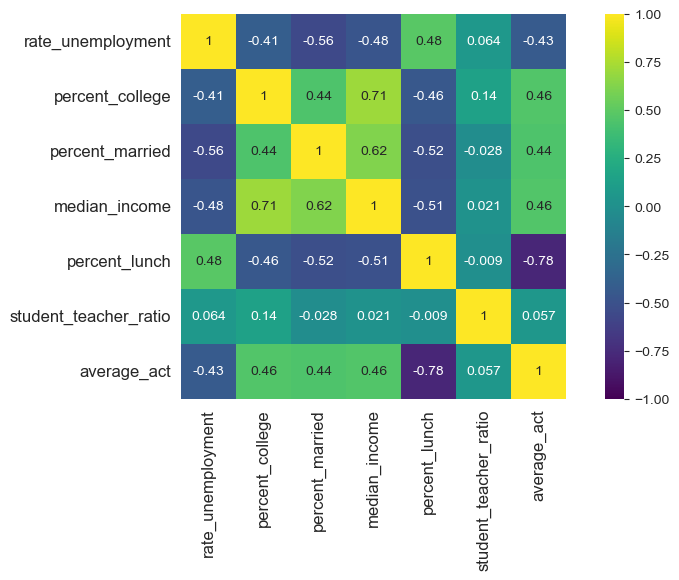

In [44]:
# Examine distributions and relationships
# Plot the correlation matrix of the numerical variables in the training data 
# to explore relationships between the variables.

predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter_status',
    'student_teacher_ratio'
]

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.show()


Observations:
average_act and unemployment rate have a negative correlation of -0.43. This could mean that schools in higher unemployment area could have lower average ACT.

average_act and percent_college have positive correlation of 0.46. This could mean that areas with higher percentage of college has higher ACT scores.

average_act and percent_married have positive  correlation of 0.44.This could meam that areas with more married adults tend to have higher average ACT scores.

average_act and median_income have positive  correlation of 0.46.This could meam that areas with higher income  tend to have higher average ACT scores.

average_act and percent_lunch have strong negative correlation of -0.78. This could mean that higher percentage of students with free lunch tend to have lower  average ACT.

average_act and student_teacher_ration have a weak positive relation of 0.057. This could mean that the ratio has only slight impact on the average ACT,

This means that socioeconomic advantages like higher education, higher income,marriage is positiveley related to average ACT scores while socioeconomic disadvantages like unemployment and poverty leads to lower average ACT scores.

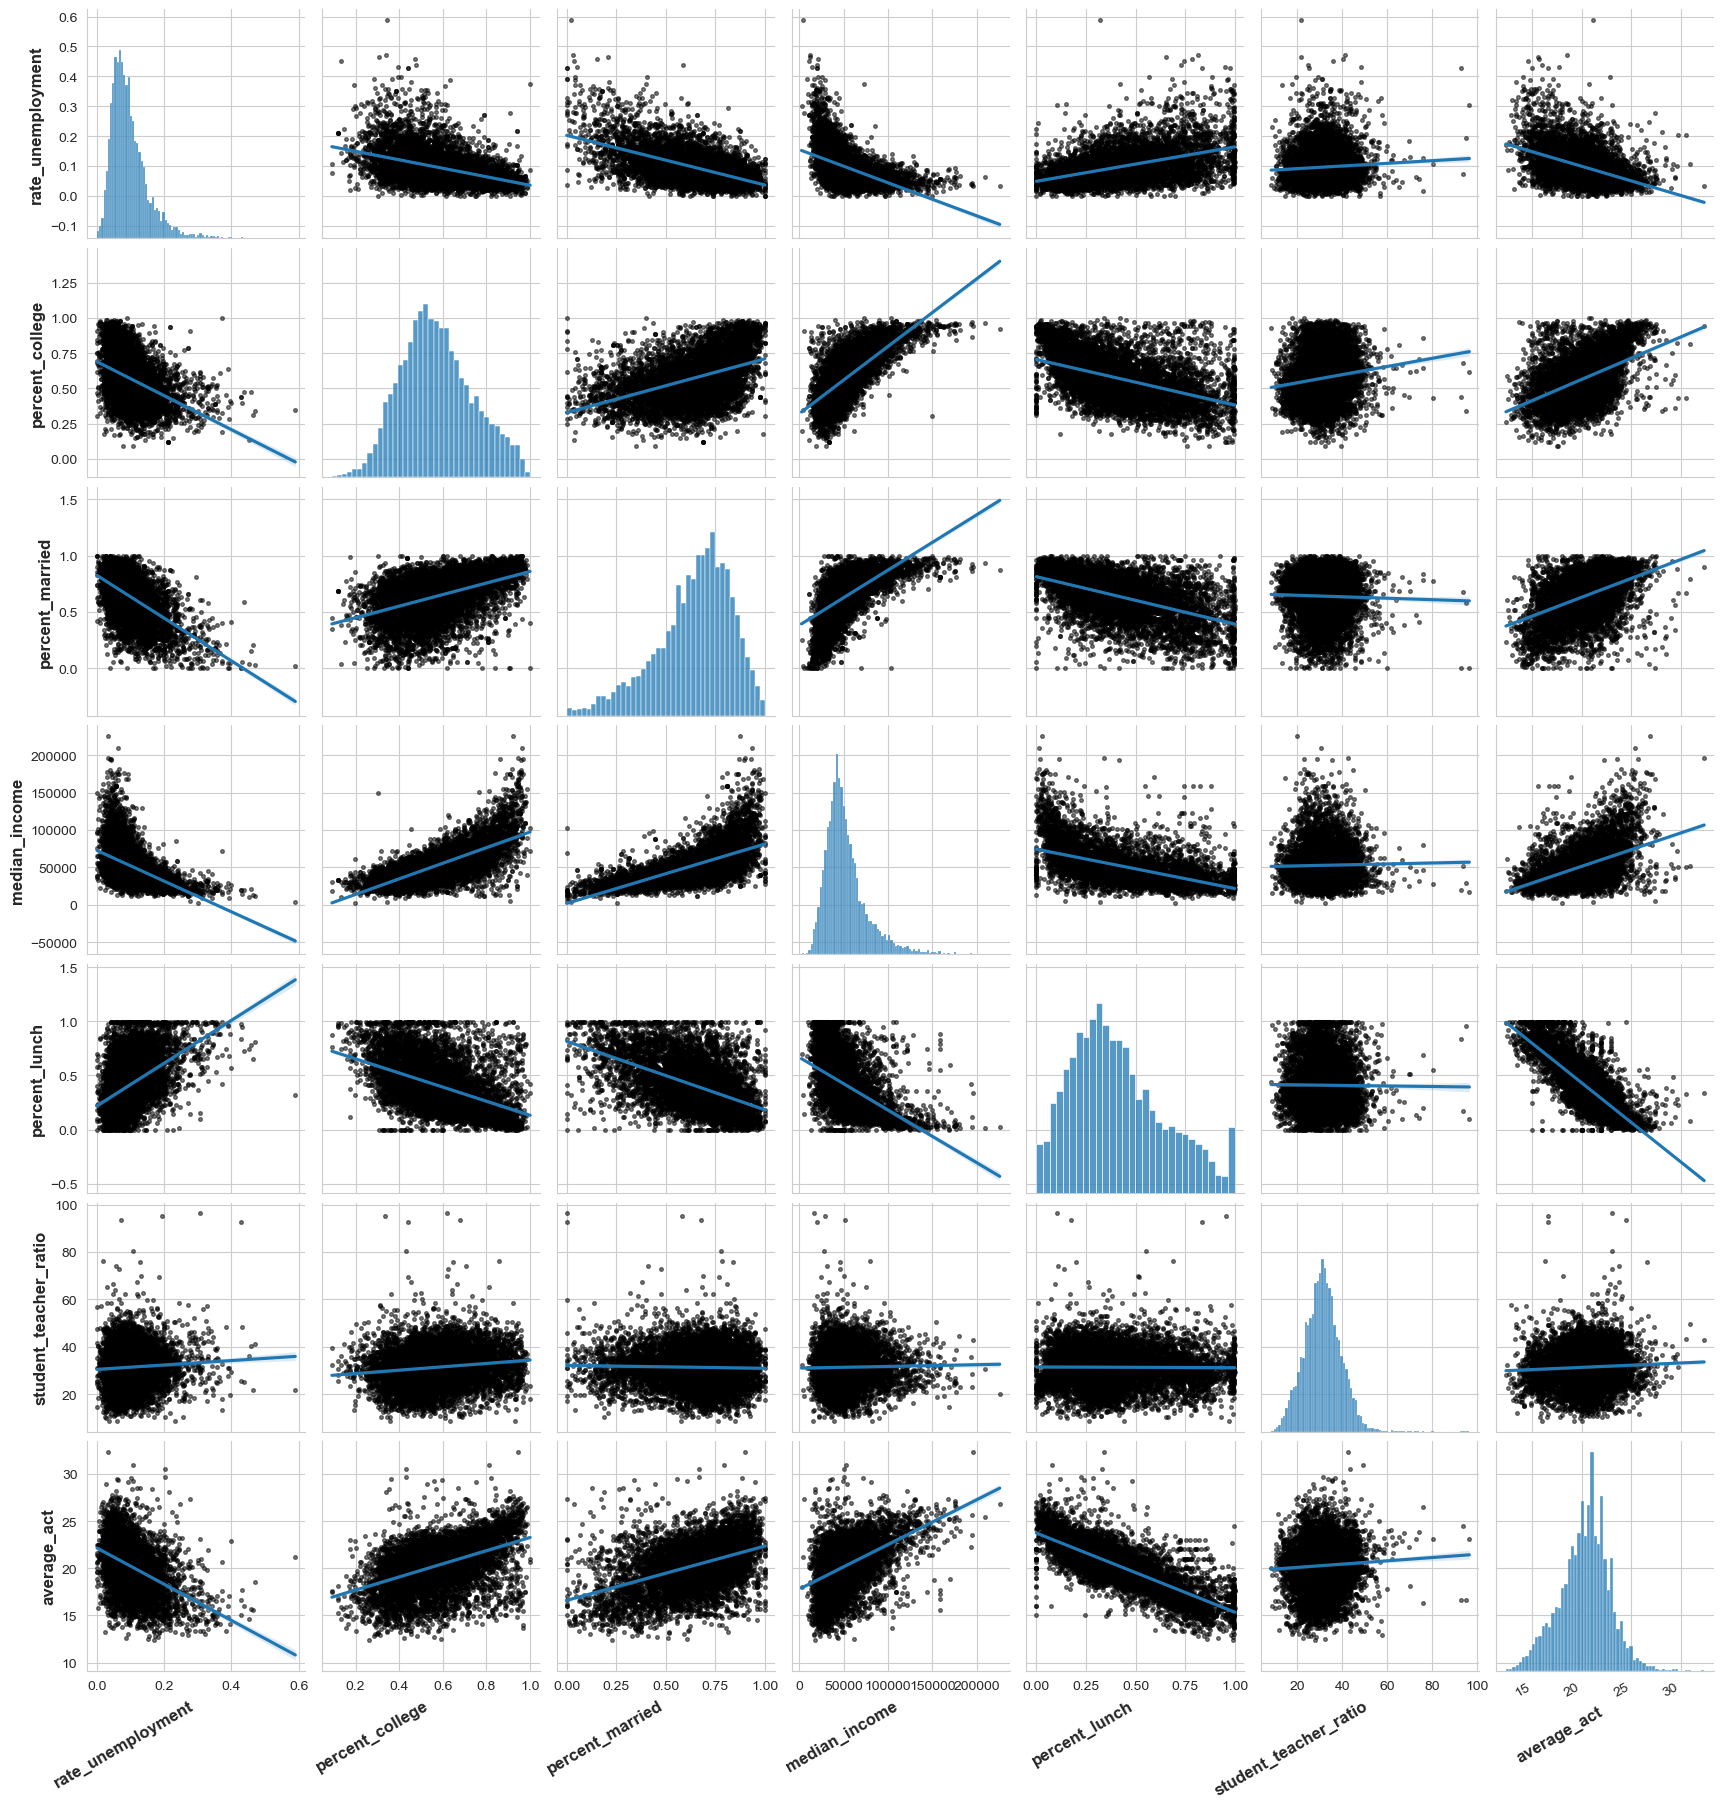

In [45]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    
    kind='reg',
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold',rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold',fontsize=12)  # Y-axis label size

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


Observations: 

The last row shows the relationship between average ACT scores to other socioeconomic factors. We can see negative slopes for unemployment rate and free lunch while positive relationship between average ACT score and higher eduction, marriage and higher income.We also see almost flat slop between student_teacher_ratio and average ACT.

#### Identify outliers

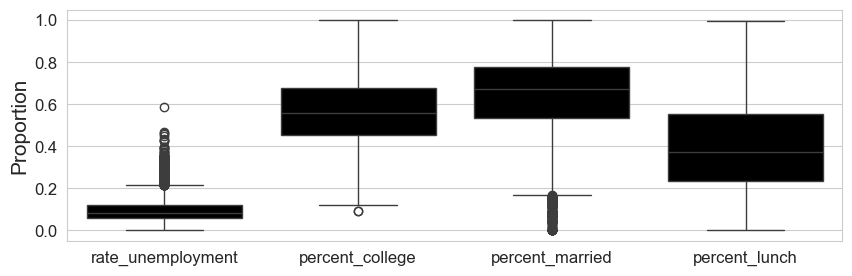

In [91]:
# We can use the interquartile range to identify outliers.
# Median income is on a different scale than other predictors, so we plot separately.

plt.figure(figsize=(10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')
fractions.remove('student_teacher_ratio')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()


Observations:

The boxplot  show us that the unemployment rate, percent college and percent married have outliers. However, the values do not seem so far away from the majority of the data, Nor do they seem like they are incorrect values so much that we would want to necessarily exclude them from our analysis.

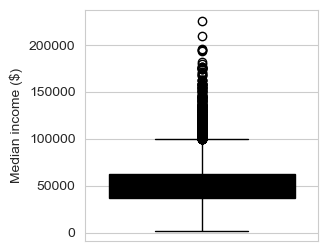

In [47]:
plt.figure(figsize=(3, 3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')
plt.show()


observation:

 We look at the boxplot for the median income. It has outliers, which is typical of income distributions.These look like a correct data for median income.

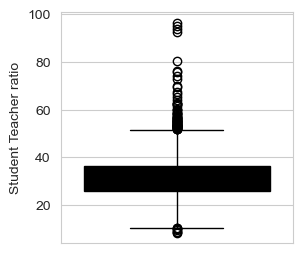

In [48]:
plt.figure(figsize=(3, 3))

sns.boxplot(data=df, y='student_teacher_ratio', color='k')

plt.ylabel('Student Teacher ratio')
plt.show()

observation:

 We look at the boxplot for the Student Teacher Ratio. Most of the data are between 20 and 40 which is typical of the student to teacher ratio. It has outliers upto 100. The ones above 100 have been deleted during data cleaning.

Summary

The numerical predictors are related to average_act. The relationships appear roughly linear.

The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

There are outliers in rate_unemployment, percent_college, percent_married,median_income and student Teacher ratio. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

The relationships are similar across charter and non-charter schools, but might be significantly different.

## Modeling

### Single input models

### We start by taking only median income as the input variable and access the relationship

Fit and assess models predicting the average ACT score from each of the input variables. We can try polynomial linear regression models, as appropriate.

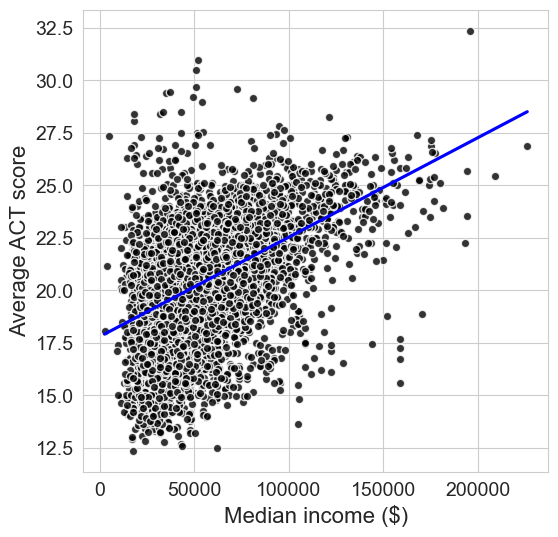

In [49]:
# Plot the regression line and the scatter plot

plt.figure(figsize=(6, 6))

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()


Observation:

There is a relationship between the median income and the average ACT score. And it appears that this simple linear regression is providing only a moderate fit of the data.

Summary:

The STATS models library allows us to fit a model using either a formula that specifies a relationship between the response and predictor variable, or by passing in the design matrices that actually include the response values as well as a matrix of predictors.

We're using STATS model's ordinary least squares function with the formula version.

We've specified that average ACT to be the response variable. 

It is going to be predicted by a simple linear regression model using median income as the predictor which means that there is an intercept and then a coefficient on the median income. 

We have fit the model to the entire data set for this data frame.

In [50]:
# Fit the simple linear regression model

model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

In [51]:
# Display the fit summary: check the sign and significance of the coefficients

print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1935.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:03   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8024      0.063    284.788

Observations:

This tells us that the intercept in the model is 17.8 and that the coefficient on median income is 4.7 * 10 to the negative 5.

It's a very small coefficient because the median income is calculated in dollars and goes over a large range, whereas the ACT score is over a much smaller range. 

We are also interested in the statistical significance of the coefficient, particularly the one on our predictor. 

We look in the column for the p values to see that they are small and are in fact zero up to three decimal places. So we have statistically significant coefficients.

The table shows us the R squared value, and that is 0.21, which is a relatively low R squared.

### Numerical assessment of fit accuracy

In [52]:
# Compute the R-squared

model_median_income.rsquared

0.21120668285819677

In [53]:
# Compute the RMSE

y_hat = model_median_income.predict()
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

2.228

In [54]:
# Compute the mean absolute error

mean_absolute_error(df['average_act'], y_hat)

1.7129480585735475

Observation:

Average error is 1.7,although the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict that ACT score from this particular input variable. 

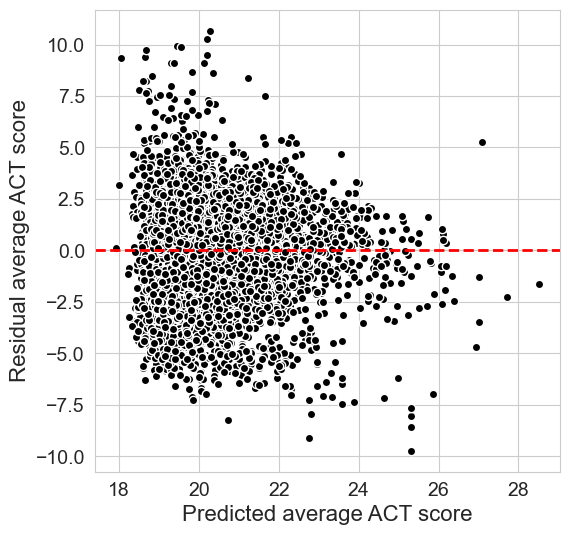

In [55]:
# Use a residual plot for graphical assessment of model fit
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Observation:

A standard approach is to use a residual plot which will show us the relationship between our predicted ACT score and the residuals, that is the error between what the actual value is and the prediction.

We're looking to see here if there's any structure to this plot. 

This is not purely a cloud of points. So we might try a more complicated model and we could consider a quadratic polynomial regression model. 

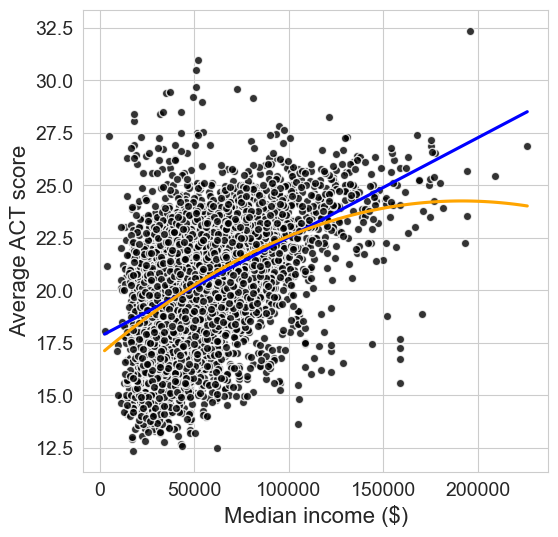

In [56]:
# Try a quadratic model. Plot the regression curves and the scatter plot

plt.figure(figsize=(6, 6))

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    order=2,
    color='orange',
    ci=False,
    scatter=False
)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

Observations:

We have two different plots. One with the original simple linear regression model where we'll plot the regression line using a blue line, and one where we have now said that the order is equal to 2, which tells with the reg plot to compute a quadratic regression line(orange color). And this shows us both of those regression lines together with the scatter plot.

The quadratic model might provide a slightly better fit, but it is not clear that it is going to be significantly better than the simple linear regression. 

But we should go ahead and fit the model and and then consider the accuracy and consider the significance of the quadratic model.

In [57]:
# Fit a quadratic linear regression model

model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df
).fit()

In [58]:
# Display the fit summary

print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

Observations:

We see now that the r squared is 0.219. It is very slightly higher than it was for the previous model, and we can consider the coefficients and their significance. 

This does show us that the coefficient on the squared term is statistically significant.

 It's not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [59]:
# Assess the model significance
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.241102e-99
I(median_income ** 2)    1.286227e-17
dtype: float64

In [60]:
anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35864.094675,0.0,NaN,NaN,NaN
1,7224.0,35503.403666,1.0,360.691009,73.391044,1.286227e-17


Observations:

We use an analysis of variance or an ANOVA to compare these two nested polynomial linear regression models.Here we are comparing the simpler model to the more complicated model and asking whether the more complicated model is statistically significant in terms of its difference from the simpler model.  

The P value being quite small, is indicating that there is a statistically significant difference.  P value is in fact exactly the same as the P value on the coefficient for the squared term, which is just the difference between these two models.

### Assess the model accuracy

In [61]:
# Compute the mean absolute error

mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972292303759704

In [62]:
# Compare the quadratic model accuracy to the first order model

mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129480585735475

Observation:

We look at the accuracy of the quadratic model and we will use the mean absolute error again. But now we're looking at our quadratic model and the mean absolute error is 1.69, which if we compare this to the first order model, is smaller, but not practically smaller.

So this shows us that we have the ability to look at a relationship between one of our socioeconomic predictor variables and the average ACT score and, and formulate a model that provides some predictive power of what the ACT score actually is. 

But it is a relatively weak prediction. And we've also seen that a linear model is probably going to be sufficient to predict the ACT score, and that considering something like a quadratic is not necessarily going to provide a much better fit. 

#### We now see Unemployment rate as the input variable and access the relationship.

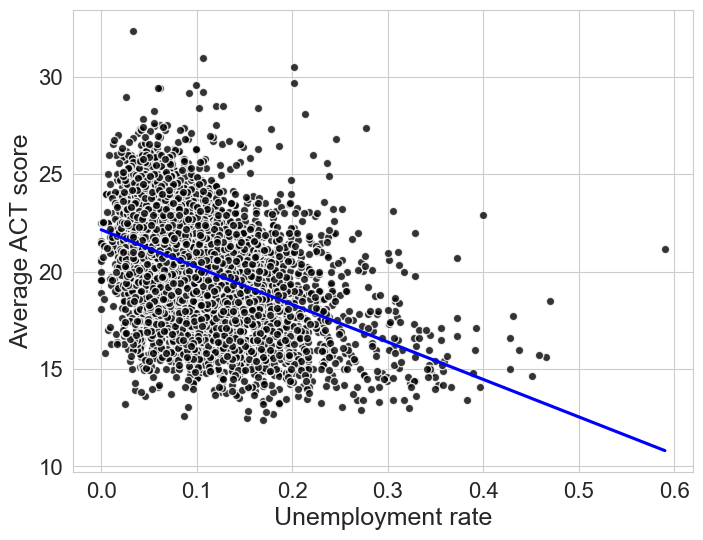

In [63]:
plt.figure(figsize=(8, 6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16)

plt.show()

In [64]:
model_ru = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()

In [65]:
print(model_ru.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1511      0.05

The model is significant, but it is not great. The  𝑅2=0.19 , which is low.

### Percent of adults with a college degree

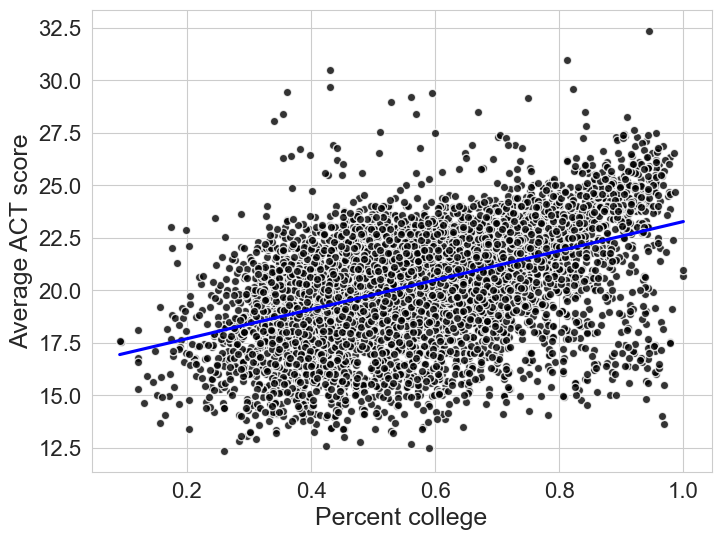

In [66]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='percent_college',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent college', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [67]:
model_pc = smf.ols(formula='average_act ~ percent_college', data=df).fit()

In [68]:
print(model_pc.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3035      0.095    1

The model is significant, but it is not great. The  𝑅2=0.20 , which is low.

### Percent of adults married

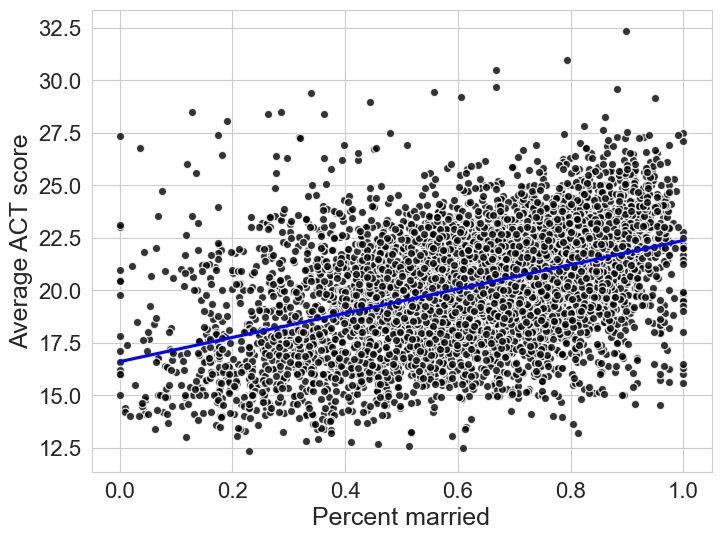

In [69]:
plt.figure(figsize=(8,6))


sns.regplot(data=df,
            x='percent_married',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent married', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [70]:
model_pm = smf.ols(formula='average_act ~ percent_married', data=df).fit()

In [71]:
print(model_pm.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:05   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6043      0.093    1

The model is significant, but it is not great. The  𝑅2=0.20 , which is low.

### Percent of students with free or reduced price lunch

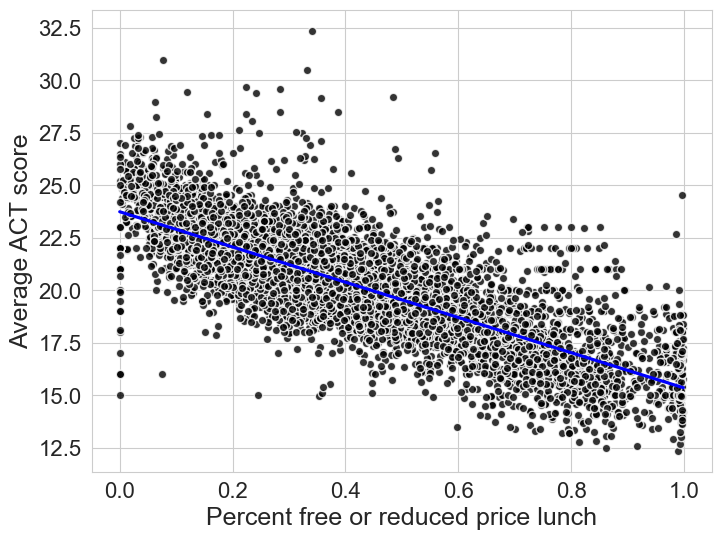

In [72]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent free or reduced price lunch', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [73]:
model_pl = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

print(model_pl.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:05   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

There is a strong negative linear relationship between the percent of students with free or reduced price lunch and the average ACT score ( 𝑅2=0.61 ).

#### Student Teacher Ratio

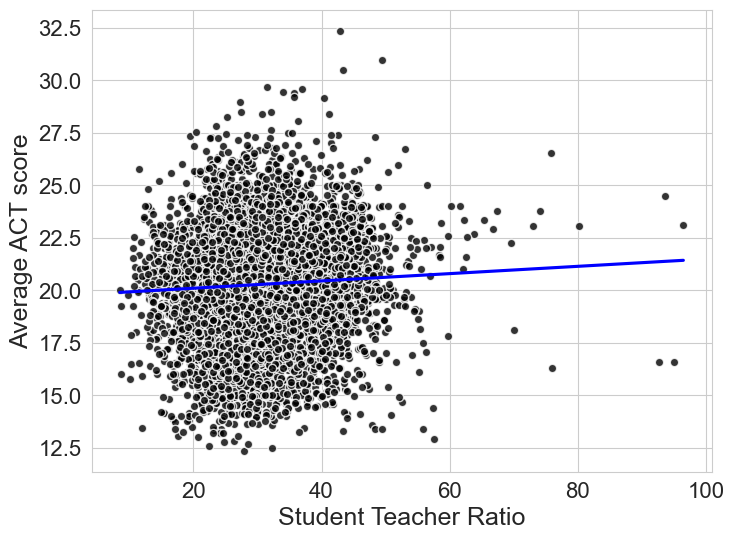

In [74]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='student_teacher_ratio',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Student Teacher Ratio', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [75]:
model_pl = smf.ols(formula='average_act ~ student_teacher_ratio', data=df).fit()

print(model_pl.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.30
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.42e-06
Time:                        10:21:06   Log-Likelihood:                -16889.
No. Observations:                7227   AIC:                         3.378e+04
Df Residuals:                    7225   BIC:                         3.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                19.75

The model is significant, but it is not good. The  𝑅2=0.003 , which is extremely low.

### Multiple linear regression

#### We start be fitting  the multiple linear regression model using all socioeconomic variables and student-teacher ratio as predictors.

In [76]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch + student_teacher_ratio',
    data=df
).fit()

In [77]:
# Print the summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2044.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:06   Log-Likelihood:                -13314.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7220   BIC:                         2.669e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.40

Observation:

We see that we have two of our model coefficients that are not statistically significant.

The coefficient on percent married and the coefficient on median income have relatively large P values, indicating that they are not statistically significant. 

We noticed in our exploratory data analysis that there were correlations among these two predictor variables, so we do not need all of these predictors in a single model.

We also note that the R squared is roughly 0.63, which is much higher than what we had seen with any of our individual predictor models.

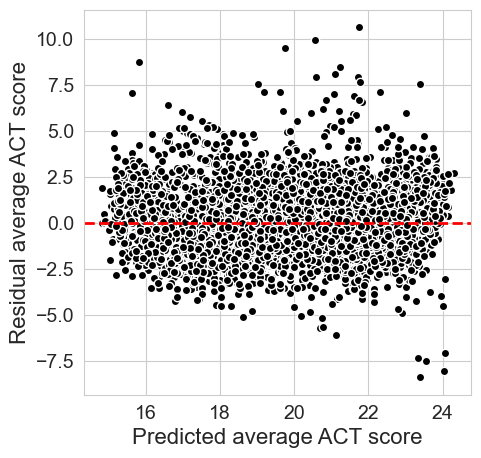

In [78]:
# Use a residual plot for graphical assessment of model fit

y_hat = model.predict()

plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Observation:

In this plot, we see that there is relatively no structure to the residual plot, indicating that we're unlikely to improve the model by making transformations of the input variables that we've used in the model.

In [79]:
# Compute the mean absolute error
mean_absolute_error(df['average_act'],model.predict())

1.1429278088088577

Looking at the mean absolute error, we see that this is less than what we were seeing in individual predictor models.

Summary:

The multiple linear regression model with all socioeconomic predictors can predict ACT scores with an average error of roughly 1 point using these predictors.

The residual plot suggests that there will be limited improvement from adding transformations of these predictors.

Not all predictors have significant coefficients.

Adding predictors to the model may improve the performance.

### Fit a reduced model with the significant predictors

we will fit a reduced model that only includes those predictor variables that has statistically significant coefficients and see if that reduced model is sufficient to predict the average ACT score. In this case only including the unemployment rate, percent college, and the percent of students eligible for free or reduced price lunch in the model,

In [80]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + student_teacher_ratio',
    data=df
).fit()

In [81]:
# print the summary
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     3066.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:06   Log-Likelihood:                -13314.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7222   BIC:                         2.667e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.36

We see that all four of these variables having statistically significant coefficients. 

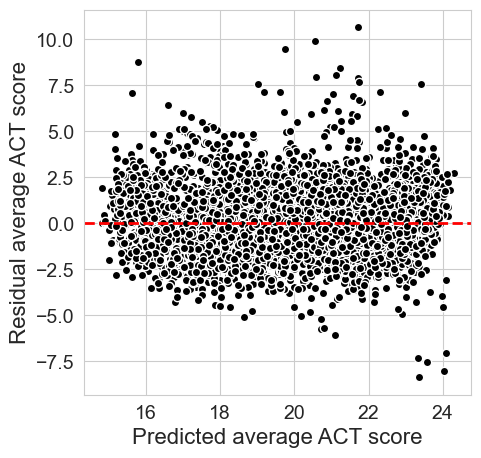

In [82]:
# Use a residual plot for graphical assessment of model fit

y_hat = model_reduced.predict()

plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

We can use a residual plot for a graphical assessment of this model fit and see that we have a very similar residual plot to what we had with the full model. There is again essentially no structure to the model, indicating that we do not need to include transformations of these particular predictors in order to improve the model.

In [83]:

# Compute the mean absolute error

mean_absolute_error(df['average_act'],model_reduced.predict())

1.1429844068740869

We can do a numerical assessment of the accuracy again using the mean absolute error, and this looks very similar to what we had with the full model. When we compare the accuracy of the model in terms of the mean absolute error or the R squared between the reduced model and the full model that included all five predictor variables, they are essentially equivalent. 

### Compare the accuracy between full and reduced models

In [84]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({
    'Mean Absolute Error': [mae_full, mae_reduced],
    'R-squared': [r2_full, r2_reduced]
}, index=['full model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
full model,1.1429,0.6294
reduced model,1.1430,0.6294


### Use an ANOVA to test the significance of difference between models

In [85]:
anova_lm(model_reduced,model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7222.0,16850.719791,0.0,NaN,NaN,NaN
1,7220.0,16850.155159,2.0,0.564631,0.120967,0.886065


We can also consider the significance of the difference between the models using an ANOVA and find that there is no statistically significant difference between the reduced model that just included those three predictor variables and the larger model that had five of the socioeconomic predictor variables

Summary:

The model predicting the average ACT score from rate_unemployment, percent_college, percent_lunch and student to teacher ratio is not significantly different than the model with all six variables as predictors.

## Scaling

### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame

Now we're going to scale the predictors in the reduced model so that they have a mean of 0 and a standard deviation of 1.So that we can use the magnitude of the coefficients in this model to compare the relative importance of each of those predictor variables at contributing to our estimate of the average ACT score.

We are going to use the standard scalar from Scikit Learn to learn the transformation that we need to apply to give each one of those variables a mean of 0 and a standard deviation of 1. 

The standard scalar is doing that kind of transformation. This conversion, where we take an original variable and transform it to have a mean of 0 and a standard deviation of 1 is also called standardization. 

We learn our standard scalar and then apply that to the predictor variables to produce these new scaled variables using the transform method. 

In [86]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch', 'student_teacher_ratio']

scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

scaler = StandardScaler().fit(df[predictor_variables])

df[scaled_columns] = scaler.transform(df[predictor_variables])

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized', 'student_teacher_ratio_normalized']


### Check the mean and standard deviation of the transformed data.

In [87]:
df[scaled_columns].agg(['mean', 'std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized,student_teacher_ratio_normalized
mean,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0


In [88]:
### Fit the multiple linear regression model with the normalized predictors
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized + student_teacher_ratio_normalized',
    data=df
).fit()

In [89]:
 # Print the summary
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     3066.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:21:06   Log-Likelihood:                -13314.
No. Observations:                7227   AIC:                         2.664e+04
Df Residuals:                    7222   BIC:                         2.667e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

We see that we have a much larger magnitude of a coefficient for the percent lunch variable than for either of the other three variables.So this says that the estimated change in the average ACT score at a school is of much larger magnitude when we would have a one standard deviation change in the percent lunch variable as compared to the percent college or the unemployment rate variable or the student teacher ratio.

In [90]:
# Compare the accuracy between the original and normalized models
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({
    'Mean Absolute Error': [mae_normalized, mae_reduced],
    'R-squared': [r2_normalized, r2_reduced]
}, index=['normalized model', 'reduced model']).round(4)



,Mean Absolute Error,R-squared
normalized model,1.143,0.6294
reduced model,1.143,0.6294


Conclusion
The analysis shows that college entrance test scores (ACT and SAT) are related to socioeconomic variables and student teacher ratio

In particular, using only the percent of students at a school receiving free or reduced price lunch, we can predict ACT scores to within a single point, on average.

The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis. It was also the only variable other than the student to teacher ratio measured for students at the school, rather than for the neighborhood.

